Proyecto 1: Predecir el uso de cemento por mezcla usando ML
    Este programa aprende a predecir cuantos kilos de cemento se deben de usar en una mezcla.

In [1]:
pip install scikit-learn matplotlib seaborn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.1 MB 9.7 MB/s eta 0:00:02
   ------------ --------------------------- 3.4/11.1 MB 8.8 MB/s eta 0:00:01
   ----------------- ---------------------- 5.0/11.1 MB 8.3 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/11.1 MB 7.6 MB/s eta 0:00:01
   --------------------------- ------------ 7.6/11.1 MB 7.5 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.1 MB 7.3 MB/s eta 0:00:01
   ------------------------------------- -- 10.5/11.1 MB 7.1 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 6.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   - -------------------------------------- 1.3/41.0 MB 6.8 MB/s eta 0:00:06
   -- ------------------------------------- 2.6/41.0 MB 6.7 MB/s eta 0:00:06
   ---- ----------------------------------- 4.2/41.0 MB 6.9 MB/s eta 0:00:06
   ----- --

In [2]:
import pandas as pd
import os

In [3]:
#Se busca la ruta del archivo, se carga en un dataframe la tabla PRODUCCION
archivo1 = "CONCRETERA 1.1.xlsx"
r_1 = os.path.abspath(archivo1)
df = pd.read_excel("CONCRETERA 1.1.xlsx", sheet_name="PRODUCCION_T")
print(r_1)
print(df.head)

c:\Users\Dell\OneDrive\Desktop\PROYECTO CONSTRUCCION DS\CONCRETERA 1.1.xlsx
<bound method NDFrame.head of       ID  ID_FECHA ID_MEZCLA  CANTIDAD_M3 ID_CLIENTE ID_PERSONAL  \
0    136        11     MZ001          2.5     CLI003      PER007   
1    137        11     MZ001          3.0     CLI003      PER007   
2    138        13     MZ006          6.0     CLI003      PER007   
3    139        13     MZ006          4.0     CLI003      PER006   
4    140        15     MZ006          7.0     CLI003      PER011   
..   ...       ...       ...          ...        ...         ...   
532  672        87     MZ001          3.0     CLI003      PER005   
533  673        87     MZ002          3.0     CLI003      PER004   
534  674        87     MZ002          2.0     CLI003      PER004   
535  675        87     MZ002          2.0     CLI003      PER004   
536  676        88     MZ002          5.0     CLI003      PER004   

       OBSERVACIONES  MAT005    MAT004    MAT006  MAT007  MAT001  MAT002  
0 

In [4]:
# Eliminamos columnas que no ayudan o no son numéricas
df_lim = df.drop(['ID', 'ID_FECHA', 'ID_CLIENTE', 'ID_PERSONAL', 'OBSERVACIONES'], axis=1)

# 2. Verificar valores nulos
print("Valores nulos por columna:")
print(df_lim.isnull().sum())

# Luego haces el get_dummies solo con las que sí necesitas
df_final = pd.get_dummies(df_lim, columns=["ID_MEZCLA"], drop_first=True)

# Variables independientes (X)
X = df_final.drop("MAT005", axis=1)  # Estamos prediciendo cemento

# Variable objetivo (y)
y = df_final["MAT005"]

Valores nulos por columna:
ID_MEZCLA      0
CANTIDAD_M3    0
MAT005         0
MAT004         0
MAT006         0
MAT007         0
MAT001         0
MAT002         0
dtype: int64


In [5]:
df_final.to_excel("PROYECTO1.xlsx", index= False)

In [6]:
#DIVIDIMOS LOS DATOS EN ENTRENAMIENTO Y PRUEBA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
#Entrenamos el modelo de regresion lineal
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

In [8]:
#prediccion
y_pred = modelo.predict(X_test)

In [9]:
#Evaluacion
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = modelo.predict(X_test)
print("MAE", mean_absolute_error(y_test, y_pred))
print("R2", r2_score(y_test, y_pred))

MAE 0.13610591847061546
R2 0.5828318181017389


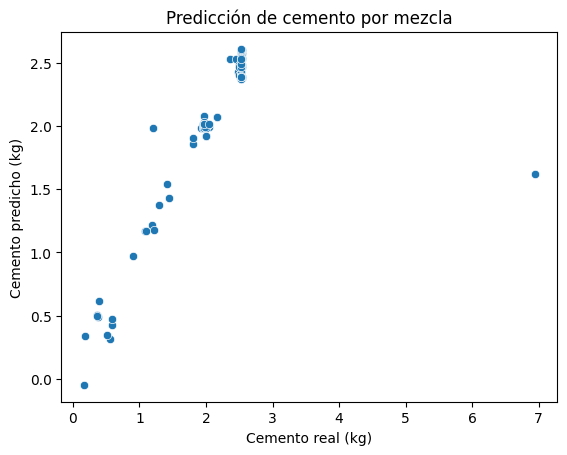

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Cemento real (kg)")
plt.ylabel("Cemento predicho (kg)")
plt.title("Predicción de cemento por mezcla")
plt.show()